## Proyecto Final: Predicción de Precios de Viviendas


### Parte 1: Selección, Exploración y Limpieza de Datos (2 puntos)

### 1.1. Selección y Justificación:

Para este proyecto se utiliza el dataset de precios de viviendas disponible en Kaggle: [House Pricing Regression - Housing.csv](https://www.kaggle.com/code/sahityasetu/house-pricing-regression/input?select=Housing.csv). Este conjunto de datos contiene información relevante sobre diferentes características de viviendas y su precio de venta.

Descripción del problema de negocio
    
El objetivo es predecir el precio de venta de una vivienda a partir de sus características, lo cual es fundamental para agentes inmobiliarios, compradores y vendedores que buscan estimar el valor de una propiedad de manera precisa y basada en datos. Una predicción precisa ayuda a tomar mejores decisiones de compra, venta o inversión en el mercado inmobiliario.

Variable objetivo (target)

La variable objetivo de este análisis es **'price'**, que representa el precio de venta de la vivienda. 
Como variable independiente principal se utilizará **'sqft_living'** (superficie habitable en pies cuadrados) para predecir el precio.

### 1.2. Carga e Inspección Inicial:

In [18]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Housing.csv")

# Inspección inicial
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
df.info()

print("\nDescripción estadística del dataset:")
display(df.describe())

Primeras filas del dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Descripción estadística del dataset:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Hallazgos iniciales

- El dataset contiene 545 filas y 13 columnas.
- Las variables principales incluyen: 'price', 'sqft_living', etc.
- No se observan valores nulos.
- La variable 'price' muestra una media de 4.766729e+06, un mínimo de 1.750000e+06, y un máximo de 1.330000e+07 (según .describe()).
- La variable 'sqft_living' tiene un rango de 1650 a 16200 pies cuadrados.

### 1.3. Limpieza de Datos:

1.3.1 Identificación de valores faltantes

In [2]:
# Verificar valores faltantes en cada columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


1.3.2 Manejo de valores faltantes

No se encontraron valores faltantes en el dataset. Por lo tanto, no es necesario realizar imputación ni eliminación de filas/columnas.

In [3]:
# Revisar tipos de datos
print("Tipos de datos originales:")
print(df.dtypes)

# Si es necesario, convertir tipos (ejemplo: asegurarse que 'area', 'bedrooms', etc. sean numéricos)
# df['area'] = df['area'].astype(int)
# df['bedrooms'] = df['bedrooms'].astype(int)
# ... (repetir según necesidad)

# Verificar nuevamente
print("\nTipos de datos después de la conversión (si aplica):")
print(df.dtypes)

Tipos de datos originales:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Tipos de datos después de la conversión (si aplica):
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Comprobación y corrección de tipos de datos

Tipos de datos: Se revisaron los tipos de datos y todos son correctos para el análisis. Las variables numéricas están en formato int64 y las categóricas como object.

### 1.4. Análisis Exploratorio de Datos (EDA):


- El scatter plot muestra la tendencia general de que a mayor área, mayor precio, aunque con cierta dispersión.
- El boxplot revela cómo el precio varía según el número de dormitorios, mostrando la mediana y la dispersión para cada grupo.

1.4.1 Grafico de dispersión (scatter plot) entre area y price

Esto permite ver la relación directa entre el tamaño de la vivienda y su precio.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


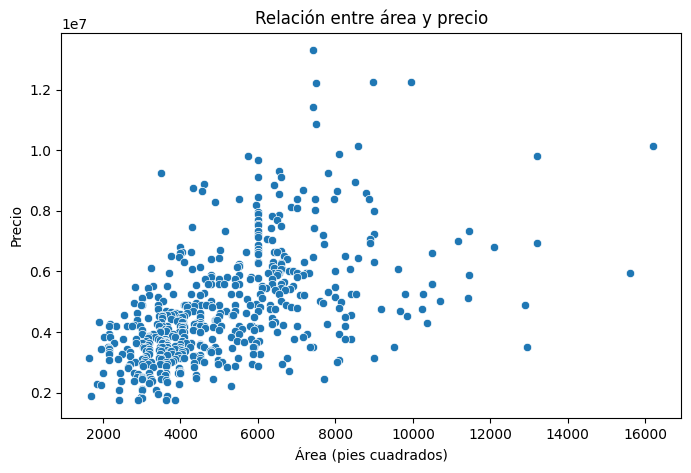

In [4]:
%pip install matplotlib
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relación entre área y precio')
plt.xlabel('Área (pies cuadrados)')
plt.ylabel('Precio')
plt.show()

1.4.2 Grafico Boxplot del precio según el número de dormitorios (bedrooms)

Permite visualizar cómo varía el precio de las viviendas según la cantidad de dormitorios.

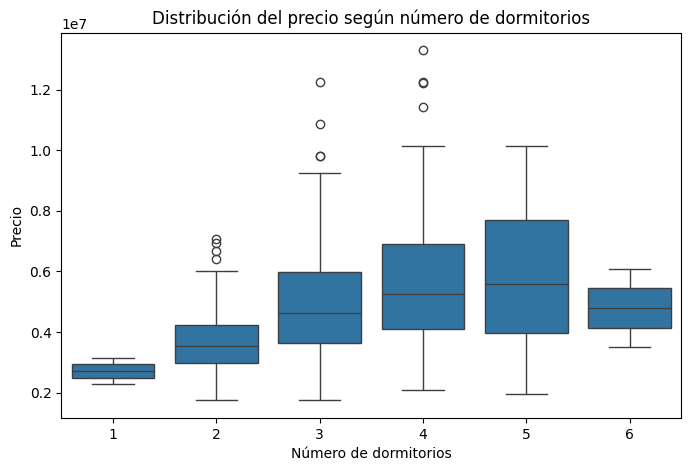

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Distribución del precio según número de dormitorios')
plt.xlabel('Número de dormitorios')
plt.ylabel('Precio')
plt.show()

### Parte 2: Aplicando Programación Orientada a Objetos (POO) para el Pipeline (4 puntos)

### 2.1. Creación de la Clase DataPipeline:

In [6]:
class DataPipeline:
    
    # Inicialización del modelo
    def __init__(self):
        self.model = None
        
    # Preprocesamiento de datos
    def preprocess(self, df):
        df = df.copy()
        df['area_miles'] = df['area'].apply(lambda x: x / 1000)
        df_dummies = pd.get_dummies(df, drop_first=True)
        X = df_dummies.drop('price', axis=1)
        y = df_dummies['price']
        return X, y
    
    # Entrenamiento del modelo
    def train(self, X, y, model_instance):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model_instance.fit(X_train, y_train)
        self.model = model_instance
        print('Modelo entrenado correctamente.')

    # Evaluación del modelo
    def evaluate(self, X, y):
        if self.model is None:
            print('El modelo no ha sido entrenado.')
            return
        y_pred = self.model.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f'MSE: {mse:.2f}')
        print(f'R2 Score: {r2:.2f}')        


### 2.2. Demostración de la Clase en el Notebook

Creacion de instancia de tu clase DataPipeline.

In [7]:
pipeline = DataPipeline()

Llama secuencialmente a los métodos preprocess, train, y evaluate para ejecutar todo el flujo de trabajo.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Crear la instancia del pipeline
pipeline = DataPipeline()

# 2. Preprocesar los datos
X, y = pipeline.preprocess(df)

# 3. Entrenar el modelo (por ejemplo, regresión lineal)
modelo = LinearRegression()
pipeline.train(X, y, modelo)

# 4. Evaluar el modelo
pipeline.evaluate(X, y)

Modelo entrenado correctamente.
MSE: 1125550288218.71
R2 Score: 0.68


### Parte 3: Calidad y Reproducibilidad del Software (4 puntos)

### 3.1. Testing con pytest (Simulado en Colab):

### 3.2. Documentación (Docstrings):

### 3.3. Gestión de Dependencias:

### 3.4. Conclusión del Proyecto: